# EDA

In [1]:
!pip install pyAudioAnalysis
!pip install eyed3
!pip install pydub

     |████████████████████████████████| 51kB 1.7MB/s 
  Created wheel for pyAudioAnalysis: filename=pyAudioAnalysis-0.3.0-cp36-none-any.whl size=49830 sha256=eac76bef9d47f063be505e215159f0a9a9102c30502b84284185cf4749f984db
  Stored in directory: /root/.cache/pip/wheels/0a/ae/82/a403b29ed85f5be45844c56d77fc9e8ab8c923a7f6295b8fdf
Successfully built pyAudioAnalysis
     |████████████████████████████████| 153kB 2.8MB/s 


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.cm as cm

In [0]:
#Constants
BATCH_SIZE = 500000

In [4]:
train = pd.read_csv('./drive/My Drive/Colab Notebooks/liverpool-ion-switching/train_clean.csv')
test = pd.read_csv('./drive/My Drive/Colab Notebooks/liverpool-ion-switching/test_clean.csv')
train.head()

,time,signal,open_channels
0,0.0001,-2.7600,0
1,0.0002,-2.8557,0
2,0.0003,-2.4074,0
3,0.0004,-3.1404,0
4,0.0005,-3.1525,0


In [0]:
train['batch'] = 0

for i in range(0, train.shape[0]//BATCH_SIZE):
    train.iloc[i * BATCH_SIZE: (i+1) * BATCH_SIZE,3] = i
  
train1 = train[train['batch'] == 9]

In [6]:
train1

,time,signal,open_channels,batch
4500000,450.0001,6.676402,10,9
4500001,450.0002,7.047270,10,9
4500002,450.0003,6.385138,10,9
4500003,450.0004,7.200607,10,9
4500004,450.0005,7.409975,10,9
...,...,...,...,...
4999995,499.9996,2.932577,7,9
4999996,499.9997,2.711208,7,9
4999997,499.9998,4.529640,8,9
4999998,499.9999,5.652972,9,9


In [0]:
x = train.signal
Fs = 100000
win_s = 40
stride_s = 20
# F, f_names = ShortTermFeatures.feature_extraction(x, Fs, win_s, stride_s)
F, f_names =  ShortTermFeatures.feature_extraction(x, Fs, 0.0050*Fs, 0.00001*Fs)

Text(0, 0.5, 'zcr')

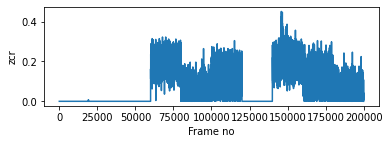

In [97]:
plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0]) 

In [98]:
F = F[0:34]
F = F.T
F.shape

(199981, 34)

In [0]:
batch_list = []
for i in range(10):
    location_tmp = [i] * 2500
    batch_list.append(location_tmp)
batch_id = np.concatenate(batch_list,axis=0)

F_ = np.concatenate(F,axis=0)

In [62]:
batch_id = np.delete(batch_id, 24999, 0)
batch_id.shape

(24999,)

In [0]:
scl = StandardScaler()
scl.fit(F)
F_ = scl.transform(F)

In [64]:
um3d = umap.UMAP(n_components=3,n_neighbors=40,min_dist=0.14,random_state=0)
F3d = um3d.fit_transform( F_ )

/usr/local/lib/python3.6/dist-packages/numba/typed_passes.py:293: NumbaPerformanceWarning:


The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../usr/local/lib/python3.6/dist-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^




In [14]:
F3d.shape

(24999, 3)

In [65]:
import plotly.graph_objects as go
import plotly.offline as offline

def enable_plotly_in_cell():
    import IPython
    from plotly.offline import init_notebook_mode
    display(IPython.core.display.HTML('''
            <script src="/static/components/requirejs/require.js"></script>
    '''))
    init_notebook_mode( connected=False )

enable_plotly_in_cell()

data = []

for i in range(10):
  start = i * 2500
  trace=go.Mesh3d(x=F3d[:,0][start:start+2500],
                    y=F3d[:,1][start:start+2500],
                    z=F3d[:,2][start:start+2500],
                    )
  data.append(trace)

layout = go.Layout(
    scene={
        'xaxis': {'title': 'X'},
        'yaxis': {'title': 'Y'},
        'zaxis': {'title': 'Z'}
    },
    font={'size': 14}
)


# fig = dict(data = [trace0], layout = layout)
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='./drive/My Drive/Colab Notebooks/liverpool-ion-switching/graph.html')

Output hidden; open in https://colab.research.google.com to view.

# Predict

In [73]:
df_F = pd.DataFrame(F_, columns=f_names[0:34])
df_F.shape

(24999, 34)

In [72]:
train1.shape

(500000, 4)